**FACE RECOGNITION (USING CNN - N.Nandhini)**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE =224
BATCH_SIZE =32

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/DataAugmentation',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

Found 168 images belonging to 3 classes.


In [5]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Datasets/DataAugmentation',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 40 images belonging to 3 classes.


In [6]:
class_indices = train_generator.class_indices
#extract class names
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'NANDHINI': 0, 'PRAVEENA': 1, 'RAMPRASATH': 2}
Class names: ['NANDHINI', 'PRAVEENA', 'RAMPRASATH']


In [11]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 86s 13s/step - accuracy: 0.2737 - loss: 2.9736 - val_accuracy: 0.3000 - val_loss: 1.1007
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3123 - loss: 1.0958 - val_accuracy: 0.4000 - val_loss: 1.0475
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4243 - loss: 1.0080 - val_accuracy: 0.6000 - val_loss: 0.9526
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6752 - loss: 0.8435 - val_accuracy: 0.7250 - val_loss: 0.6325
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 951ms/step - accuracy: 0.7158 - loss: 0.6108 - val_accuracy: 0.8250 - val_loss: 0.5129
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7961 - loss: 0.4286 - val_accuracy: 0.7750 - val_loss: 0.3716
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9370 - loss: 0.1831 - val_accuracy: 0.8500 - val_loss: 0.2216
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9754 - loss: 0.1041 - val_accuracy: 0.9250 - val_loss: 0.1598
Epoch 9/10


In [16]:
model.save('/content/drive/MyDrive/Datasets/DataAugmentation.h5')

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Datasets/DataAugmentation.h5')
print("Model Loaded")

Model Loaded


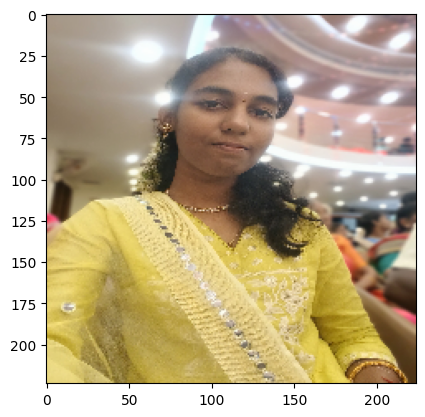

In [26]:
test_image_path="/content/drive/MyDrive/Datasets/DataAugmentation/NANDHINI/NANDHINI/IMG20251023191425.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [28]:
#preporocess the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255

In [29]:
#make predictions
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
NANDHINI
